<a href="https://colab.research.google.com/github/fitrasaphira/Dunnhumby-Customer-Behaviour-Analysis/blob/main/Dunnhumby_Consumer_Behaviour_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dunnhumby Consumer Behaviour Analysis**


##**Dataset Overview**

Dunnhumby is a global customer data science that helps retailers  in analyzing data to improve customer experiences and develop loyalties. The dataset contains **transaction data from 25000 households that made purchases at retailers during a two-year period**. Demographic information as well as direct marketing contact history are given for specific households.

Link of the data is provided in this [Kaggle dataset link](https://www.kaggle.com/datasets/frtgnn/dunnhumby-the-complete-journey?resource=download&select=coupon.csv)

There are 8 data that will be used in this analysis, namely: :
1. Campaign Descriptions (_campaigndesc.csv)
2. Campaigns (_campaigntable.csv)
3. Coupons (coupon.csv)
4. Coupon Redemptions (_couponredempt.csv)
5. Transactions (_transactiondata.csv)
6. Demographics (_hhdemographic.csv)



##**Research Question**


- What kind of customer spends more overtime, spends less overtime, and have risk of churn?
- Of those customers who are spending more over time, which categories are growing at a faster rate?
- Of those customers who are spending less over time, with which categories are they becoming less engaged?
- Which demographic factors (e.g. household size, presence of children, income) appear to affect customer spend? -Engagement with certain categories?
- Is there evidence to suggest that direct marketing improves overall engagement?
- How can we use these consumer's purchase behavior to increase sales?

##**Content**

- Data Preparation 
- Data Cleaning
- Exploratory Data Analysis & Insights

# **Import Libary and Datasets**

**Code Preparation**

In [2]:
! pip install skimpy

#for data manipulation
import pandas as pd
from datetime import datetime
from datetime import timedelta
from datetime import date

#for liniear algebra
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px


import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

#Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, ShuffleSplit
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, plot_roc_curve, classification_report

import warnings
warnings.filterwarnings('ignore')

from sklearn import cluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.8 MB/s 
     |████████████████████████████████| 214 kB 51.9 MB/s 
     |████████████████████████████████| 51 kB 5.7 MB/s 
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [3]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1w8IkLwRJNZazKXgEXj8ZcXxZd-hXILT4-_EOF90Sqcc/edit#gid=309799725'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
campaign_desc = pd.read_csv(sheet_url_trf)
campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [4]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1w8IkLwRJNZazKXgEXj8ZcXxZd-hXILT4-_EOF90Sqcc/edit#gid=74114397'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
campaign = pd.read_csv(sheet_url_trf)
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


In [5]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1w8IkLwRJNZazKXgEXj8ZcXxZd-hXILT4-_EOF90Sqcc/edit#gid=853579445'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
coupon = pd.read_csv(sheet_url_trf)
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


In [6]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1w8IkLwRJNZazKXgEXj8ZcXxZd-hXILT4-_EOF90Sqcc/edit#gid=1374516116'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
coupon_redempt = pd.read_csv(sheet_url_trf)
coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB


In [7]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1w8IkLwRJNZazKXgEXj8ZcXxZd-hXILT4-_EOF90Sqcc/edit#gid=1529824289'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
demo = pd.read_csv(sheet_url_trf)
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [8]:
transaction = pd.read_csv('/content/transaction_data.csv')
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


#**Data Quality Verfication**

## **Handling Missing Values**

**Checking the null value**

In [ ]:
campaign_desc.isnull().sum()

In [ ]:
campaign.isnull().sum()

In [ ]:
coupon.isnull().sum()

In [ ]:
demo.isnull().sum()

In [ ]:
transaction.isnull().sum()

All of the dataset dont have missing value

## **Duplicate Value**

Checking for duplicate value

In [ ]:
campaign_desc.duplicated().sum()

In [ ]:
campaign.duplicated().sum()

In [ ]:
coupon.duplicated(['COUPON_UPC']).sum()

In [ ]:
coupon_redempt.duplicated().sum()

In [ ]:
demo.duplicated().sum()

In [ ]:
transaction.duplicated().sum()

There is no duplicate value in all of the dataset, lets move on

#**Exploratory Data Analysis**

##**What kind of customer spends more overtime, spends less overtime, and have risk of churn?**

Lets do segmentation for customer with RFM Analysis
1. **Recency**: Number of days since last purchase 
2. **Frequency** : The total number of purchases
3. **Monetary** : The average money customer spent

In [9]:
transaction.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [10]:
transaction['WEEK_NO'].value_counts()

92    33126
99    32256
42    31454
68    31423
59    31276
      ...  
5      7168
4      5379
3      4803
2      3675
1      1881
Name: WEEK_NO, Length: 102, dtype: int64

In [11]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [12]:
transaction['DAY'].value_counts()

692    7493
691    7426
641    7066
246    6746
276    6715
       ... 
5       307
1       238
2       137
278       6
643       2
Name: DAY, Length: 711, dtype: int64

In [13]:
transaction['DAY']= pd.to_datetime(transaction['DAY']).dt.strftime('%j')

In [ ]:
transaction['WEEK_NO']= pd.to_datetime(transaction['WEEK_NO']).dt.strftime('%W')
transaction['TRANS_TIME']= pd.to_datetime(transaction['TRANS_TIME']).dt.strftime('%H')

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                object 
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         object 
 9   WEEK_NO            object 
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 237.6+ MB


Lets create new variable for time of transaction by day and week

In [ ]:
df_rfm = transaction.groupby(
                        'household_key'
                    ).agg(
                        recency=pd.NamedAgg(column='recency', aggfunc='min'),
                        frequency=pd.NamedAgg(column='order_id', aggfunc='count'),
                        monetary=pd.NamedAgg(column='payment_value', aggfunc='sum')
                    ).reset_index()
df_rfm

##**Campaign Descriptions**

The campaign description data consists of start day, end day, and campaign categories for each campaign. There is 30 campaigns in total.

In [ ]:
campaign_desc

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684
5,TypeB,21,624,656
6,TypeB,22,624,656
7,TypeA,18,587,642
8,TypeB,19,603,635
9,TypeB,17,575,607


In [ ]:
campaign_desc['DESCRIPTION'].value_counts()

TypeB    19
TypeC     6
TypeA     5
Name: DESCRIPTION, dtype: int64

Lets create new variable too check the duration off campaign

In [ ]:
campaign_desc['duration'] = campaign_desc['END_DAY'] - campaign_desc['START_DAY']
campaign_desc['CAMPAIGN'] = pd.Series(campaign_desc['CAMPAIGN'], dtype='string')
campaign_desc.sort_values(['duration'])

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,duration
14,TypeB,12,477,509,32
24,TypeB,2,351,383,32
2,TypeB,25,659,691,32
5,TypeB,21,624,656,32
6,TypeB,22,624,656,32
22,TypeB,4,372,404,32
8,TypeB,19,603,635,32
9,TypeB,17,575,607,32
11,TypeB,16,561,593,32
19,TypeC,6,393,425,32


In [ ]:
campaign_desc['duration'].agg('median')

37.5

In [ ]:
fig = px.bar(campaign_desc, x='CAMPAIGN', y='duration', color='CAMPAIGN', text='duration')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

**Campaign 15** has a longest duration, the duration is way more longer than other 161 days, where other **ranging from 32-70 days**. Median of overall duration is **37.5 days**.

##**Campaigns**

The campaign dataset contains household data that participated in the campaign

In [ ]:
campaign.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [ ]:
campaign_group=campaign.groupby('household_key',as_index=False).agg(num_of_campaign=('household_key','count'))
campaign_group['num_of_campaign'].value_counts()

1     268
2     224
3     214
5     179
4     169
6     138
7     120
8      94
9      62
10     50
12     26
11     24
13      7
14      4
15      3
17      1
16      1
Name: num_of_campaign, dtype: int64

##**Coupons**

In [ ]:
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


##**Coupon Redemptions**

In [ ]:
coupon_redempt.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


##**Demographics**

In [ ]:
demo.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


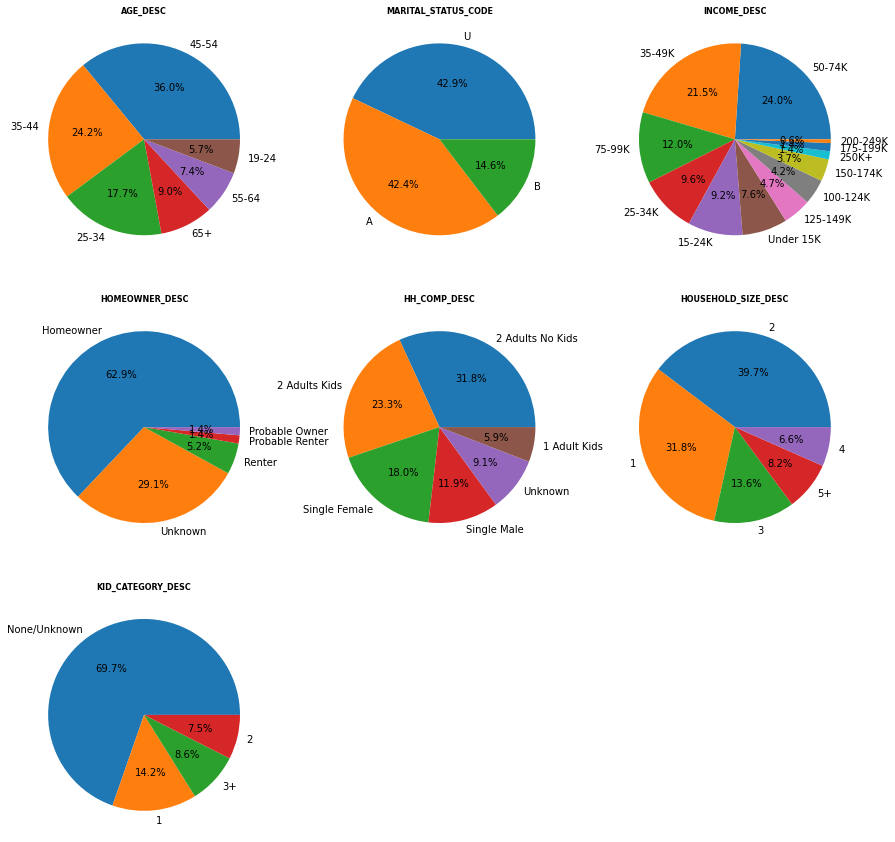

In [ ]:
def pie_categorical(demo):

    #function to plot the histogram of categorical variables in pie graph
    features = demo.columns

    #plot pie charts of categorical variables
    fig_pie_cat = plt.figure(figsize=(15,15))
    count = 1

    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_pie_cat.add_subplot(rows,cols,count)
        demo[i].value_counts().plot(kind="pie",autopct="%.1f%%",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=8)
        count += 1

def hist_numeric(demo):

    #function to plot the histogram of numeric variables
    features = demo.columns
    fig_hists = plt.figure(figsize=(15,15))
    fig_hists.subplots_adjust(hspace=0.5,wspace=0.5)
    count = 1

    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_hists.add_subplot(rows,cols,count)
        demo[i].plot(kind="hist",alpha=.5,bins=25,edgecolor="navy",legend=False,ax=ax)
        ax.set_xlabel("")
        ax.set_title(i,fontweight="bold",fontsize=10)
        count += 1

pie_categorical(demo.drop("household_key",axis=1))

###**Insight**

- a 

##**Transactions**

In [ ]:
transaction.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1.0,1004906.0,1.0,1.39,364.0,-0.60,1631.0,1.0,0.0,0.0
1,2375,26984851472,1.0,1033142.0,1.0,0.82,364.0,0.00,1631.0,1.0,0.0,0.0
2,2375,26984851472,1.0,1036325.0,1.0,0.99,364.0,-0.30,1631.0,1.0,0.0,0.0
3,2375,26984851472,1.0,1082185.0,1.0,1.21,364.0,0.00,1631.0,1.0,0.0,0.0
4,2375,26984851472,1.0,8160430.0,1.0,1.50,364.0,-0.39,1631.0,1.0,0.0,0.0
